# **Data Analysis Project with Python**

# **Project Title: Crime Analysis Across Indian Cities**

## Objective

This capstone project is aimed at analyzing real-world crime data collected from various cities across India in the year 2020, as published by the **National Crime Records Bureau (NCRB)**.

We will explore the arrest statistics across different:
- Cities
- Age groups
- Genders
- Juvenile vs Adult offenders
`
The primary goal is to:
- **Understand patterns and trends in arrest data**
- **Visualize these trends using graphs and plots**
- **Apply skills from Pandas, NumPy and Matplotlib to extract insights**

---

## Skills You'll Practice

This project will help reinforce core concepts from your syllabus:

| Concept Area | Key Skills |
|--------------|------------|
| **NumPy**    | Array creation, statistical analysis, boolean indexing |
| **Pandas**   | Data cleaning, filtering, grouping, aggregation, transformation |
| **Matplotlib** | Creating bar charts, pie charts, subplots, and customizing visualizations |

---

## Dataset Description

We will be using an Excel dataset titled:

> **NCRB_CII-2020.xlsx**

The dataset contains:
- Number of people arrested city-wise
- Breakdowns by **age group**, **gender** and **juvenile status**

---

## What You’ll Build

By the end of this project, you will have built a complete analysis notebook that can:
- Load and clean Excel data
- Perform exploratory analysis
- Create informative visualizations
- Summarize key insights

---

Let's get started!

# **Data Loading & Basic Exploration**


In this step, we will:

- Prepare your Colab notebook environment
- Upload and load the NCRB_CII-2020.xlsx dataset
- Explore the structure of the Excel file
- Inspect basic information about the data

We'll also look at:
- How to handle Excel sheets with multiple tables
- How to deal with data that contains merged or unnamed columns

**Import Required Libraries**

In [1]:
# Import essential Python libraries

import pandas as pd        # Data manipulation and analysis
import numpy as np         # Numerical operations
import matplotlib.pyplot as plt  # Basic plotting
import seaborn as sns      # Advanced visualization (optional)

# Optional settings to enhance output readability
pd.set_option('display.max_columns', None)  # Show all columns

# Optional settings
plt.style.use('seaborn-v0_8')  # Aesthetic plots

# Render plots directly in the notebook
%matplotlib inline

**Upload Dataset File**

Please upload the `NCRB_CII-2020.xlsx` file from your computer.  
This is required only once per session in Google Colab.


In [2]:
# Uploading the Excel file from local system to Colab

from google.colab import files

uploaded = files.upload()  # Prompts user to upload a file

Saving NCRB_CII-2020.xlsx to NCRB_CII-2020.xlsx


**Read the Excel File and Explore Sheet Names**

We'll use `pandas.ExcelFile()` to read the multi-sheet Excel file.  
Then, we'll inspect all available sheets to choose the relevant one for analysis.


In [3]:
# Read the uploaded Excel file
excel_file = pd.ExcelFile("NCRB_CII-2020.xlsx")

# Display all sheet names in the workbook
print("📋 Available Sheets:")
print(excel_file.sheet_names)

📋 Available Sheets:
['NCRB_CII-2020_Table.No-19B.2']


**Load Required Sheet into DataFrame**

Now, we'll load the first sheet assuming it contains city-wise crime data.  
We’ll display a few initial rows to preview the structure of the dataset.

In [4]:
# Load the relevant sheet into a Pandas DataFrame
df_raw = excel_file.parse(excel_file.sheet_names[0])  # First sheet at index 0 assumed relevant

# Show first 5 rows of data
df_raw.head()

,Si. No. (Col. 1),City (Col. 2),Juveniles Apprehended - Boys - (Col. 3),Juveniles Apprehended - Girls - (Col. 4),Juveniles Apprehended - Total - (Col. 5),18 Years & Above - Below 30 Years - Male - (Col. 6),18 Years & Above - Below 30 Years - Female - (Col. 7),18 Years & Above - Below 30 Years - Total - (Col. 8),30 Years & above - Below 45 Years - Male - (Col. 9),30 Years & above - Below 45 Years - Female - (Col. 10),30 Years & above - Below 45 Years - Total - (Col. 11),45 Years & above - Below 60 Years - Male - (Col. 12),45 Years & above - Below 60 Years - Female - (Col. 13),45 Years & above - Below 60 Years - Total - (Col. 14),60 Years & Above - Male - (Col. 15),60 Years & Above - Female - (Col. 16),60 Years & Above - Total - (Col. 17),Total - Male - (Col. 18),Total - Female - (Col. 19),Total - Total Persons Arrested by age and Sex - (Col. 20)
0,1,Ahmedabad (Gujarat),481,3,484,31809,1122,32931,28809,1700,30509,12012,893,12905,1030,199,1229,74141,3917,78058
1,2,Bengaluru (Karnataka),192,2,194,11300,439,11739,7517,828,8345,2079,346,2425,279,78,357,21367,1693,23060
2,3,Chennai (Tamil Nadu),792,0,792,79187,9427,88614,64747,9638,74385,47378,5420,52798,23567,1590,25157,215671,26075,241746
3,4,Coimbatore (Tamil Nadu),32,0,32,5650,79,5729,6674,198,6872,1120,121,1241,339,20,359,13815,418,14233
4,5,Delhi City,2720,4,2724,49370,587,49957,38914,769,39683,13179,259,13438,671,30,701,104854,1649,106503


**Initial Data Exploration**

Let’s check:
- Shape of the dataset (rows × columns)
- Data types and null values
- Basic statistics for numeric columns


In [5]:
# Shape of dataset
print(f"Dataset Shape: {df_raw.shape}")

# Check column types and missing values
print("\nDataFrame Info:")
print(df_raw.info())

# Basic descriptive statistics
print("\nDescriptive Statistics:")
df_raw.describe()

Dataset Shape: (20, 20)

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 20 columns):
 #   Column                                                     Non-Null Count  Dtype 
---  ------                                                     --------------  ----- 
 0   Si. No. (Col. 1)                                           20 non-null     object
 1   City (Col. 2)                                              20 non-null     object
 2   Juveniles Apprehended - Boys - (Col. 3)                    20 non-null     int64 
 3   Juveniles Apprehended - Girls - (Col. 4)                   20 non-null     int64 
 4   Juveniles Apprehended - Total - (Col. 5)                   20 non-null     int64 
 5   18 Years & Above - Below 30 Years - Male - (Col. 6)        20 non-null     int64 
 6   18 Years & Above - Below 30 Years - Female - (Col. 7)      20 non-null     int64 
 7   18 Years & Above - Below 30 Years - Total - (Col. 8)       20 non-nu

,Juveniles Apprehended - Boys - (Col. 3),Juveniles Apprehended - Girls - (Col. 4),Juveniles Apprehended - Total - (Col. 5),18 Years & Above - Below 30 Years - Male - (Col. 6),18 Years & Above - Below 30 Years - Female - (Col. 7),18 Years & Above - Below 30 Years - Total - (Col. 8),30 Years & above - Below 45 Years - Male - (Col. 9),30 Years & above - Below 45 Years - Female - (Col. 10),30 Years & above - Below 45 Years - Total - (Col. 11),45 Years & above - Below 60 Years - Male - (Col. 12),45 Years & above - Below 60 Years - Female - (Col. 13),45 Years & above - Below 60 Years - Total - (Col. 14),60 Years & Above - Male - (Col. 15),60 Years & Above - Female - (Col. 16),60 Years & Above - Total - (Col. 17),Total - Male - (Col. 18),Total - Female - (Col. 19),Total - Total Persons Arrested by age and Sex - (Col. 20)
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,673.400000,4.000000,677.400000,28101.400000,1568.100000,29669.500000,22313.800000,1770.200000,24084.000000,10343.400000,915.400000,11258.800000,2818.300000,220.900000,3039.200000,64250.300000,4478.600000,68728.900000
std,1544.530124,9.210977,1552.568581,62653.062094,3911.896887,66354.792985,49869.236013,4303.437104,54015.174281,24309.827221,2273.920528,26557.050777,7925.737688,584.689202,8507.982949,145093.841873,11072.200325,155799.598362
min,0.000000,0.000000,0.000000,633.000000,8.000000,641.000000,769.000000,10.000000,812.000000,314.000000,7.000000,337.000000,0.000000,0.000000,0.000000,2018.000000,33.000000,2116.000000
25%,31.250000,0.000000,31.750000,4323.250000,72.000000,4397.000000,3096.750000,93.000000,3116.500000,873.250000,56.500000,982.000000,26.000000,3.750000,29.750000,8244.750000,205.000000,8354.500000
50%,251.000000,1.500000,252.000000,6482.000000,255.500000,6737.500000,5686.500000,295.500000,6048.000000,1448.000000,152.500000,1507.500000,155.500000,18.500000,183.000000,14147.500000,684.500000,14722.000000
75%,367.750000,3.000000,367.750000,22173.500000,655.500000,22600.250000,15671.250000,856.000000,16141.750000,5495.500000,311.500000,5774.500000,527.000000,76.500000,591.500000,44478.750000,1804.250000,45679.250000
max,6734.000000,40.000000,6774.000000,281014.000000,15681.000000,296695.000000,223138.000000,17702.000000,240840.000000,103434.000000,9154.000000,112588.000000,28183.000000,2209.000000,30392.000000,642503.000000,44786.000000,687289.000000


**Step 1 Completed**

The dataset has been loaded and preliminarily inspected.

In the next step, we’ll clean the data:
- Drop total summary rows
- Fix missing or inconsistent values
- Reset indexing and prepare for analysis


# **Data Cleaning & Preprocessing**

**In this step, we will:**
- Drop total/summary rows (like the "Total Cities" record)
- Rename all column names to simplified, lowercase versions with underscores
- Strip any leading/trailing whitespaces
- Reset index for clean data referencing

In [6]:
# Display the last few rows to check for any summary/total rows
df_raw.tail()

,Si. No. (Col. 1),City (Col. 2),Juveniles Apprehended - Boys - (Col. 3),Juveniles Apprehended - Girls - (Col. 4),Juveniles Apprehended - Total - (Col. 5),18 Years & Above - Below 30 Years - Male - (Col. 6),18 Years & Above - Below 30 Years - Female - (Col. 7),18 Years & Above - Below 30 Years - Total - (Col. 8),30 Years & above - Below 45 Years - Male - (Col. 9),30 Years & above - Below 45 Years - Female - (Col. 10),30 Years & above - Below 45 Years - Total - (Col. 11),45 Years & above - Below 60 Years - Male - (Col. 12),45 Years & above - Below 60 Years - Female - (Col. 13),45 Years & above - Below 60 Years - Total - (Col. 14),60 Years & Above - Male - (Col. 15),60 Years & Above - Female - (Col. 16),60 Years & Above - Total - (Col. 17),Total - Male - (Col. 18),Total - Female - (Col. 19),Total - Total Persons Arrested by age and Sex - (Col. 20)
15,16,Nagpur (Maharashtra),328,3,331,7248,249,7497,5263,361,5624,1529,112,1641,112,6,118,14480,731,15211
16,17,Patna (Bihar),24,0,24,3991,142,4133,1270,177,1447,729,208,937,0,0,0,6014,527,6541
17,18,Pune (Maharashtra),343,2,345,9711,290,10001,6110,362,6472,2296,184,2480,199,49,248,18659,887,19546
18,19,Surat (Gujarat),412,0,412,20287,282,20569,14887,314,15201,5890,216,6106,479,76,555,41955,888,42843
19,Total Cities,Total Cities,6734,40,6774,281014,15681,296695,223138,17702,240840,103434,9154,112588,28183,2209,30392,642503,44786,687289


In [7]:
# Drop row where 'State/UT' or equivalent column is 'Total Cities'

# Find the row index for total/summary row (usually last row)
summary_row_index = df_raw[df_raw.iloc[:, 0] == 'Total Cities'].index

# Drop it if it exists
if not summary_row_index.empty:
    df_raw.drop(index=summary_row_index, inplace=True)
    print(f"Dropped summary row at index: {summary_row_index[0]}")
else:
    print("No summary row found to drop.")

Dropped summary row at index: 19


**Rename Columns Cleanly**

In [8]:
# Rename all columns to be easier to work with
print("Current Column Names :", df_raw.columns)

df_raw.columns = [
    'Index', 'City', 'Boys', 'Girls', 'Juvenile_Total',
    'M_18_30', 'F_18_30', 'Total_18_30',
    'M_30_45', 'F_30_45', 'Total_30_45',
    'M_45_60', 'F_45_60', 'Total_45_60',
    'M_60_plus', 'F_60_plus', 'Total_60_plus',
    'Total_Male', 'Total_Female', 'Grand_Total'
]

print("Columns renamed successfully :", df_raw.columns)

Current Column Names : Index(['Si. No. (Col. 1)', 'City (Col. 2)',
       'Juveniles Apprehended - Boys - (Col. 3)',
       'Juveniles Apprehended - Girls - (Col. 4)',
       'Juveniles Apprehended - Total - (Col. 5)',
       '18 Years & Above - Below 30 Years - Male - (Col. 6)',
       '18 Years & Above - Below 30 Years - Female - (Col. 7)',
       '18 Years & Above - Below 30 Years - Total - (Col. 8)',
       '30 Years & above - Below 45 Years - Male - (Col. 9)',
       '30 Years & above - Below 45 Years - Female - (Col. 10)',
       '30 Years & above - Below 45 Years - Total - (Col. 11)',
       '45 Years & above - Below 60 Years - Male - (Col. 12)',
       '45 Years & above - Below 60 Years - Female - (Col. 13)',
       '45 Years & above - Below 60 Years - Total - (Col. 14)',
       '60 Years & Above - Male - (Col. 15)',
       '60 Years & Above - Female - (Col. 16)',
       '60 Years & Above - Total - (Col. 17)', 'Total - Male - (Col. 18)',
       'Total - Female - (Col. 19)',
   

**Reset Index & Preview Cleaned Data**

In [9]:
# Reset index (recommended after row deletion)
df_raw.reset_index(drop=True, inplace=True)

# Show top records to verify
df_raw.head()

,Index,City,Boys,Girls,Juvenile_Total,M_18_30,F_18_30,Total_18_30,M_30_45,F_30_45,Total_30_45,M_45_60,F_45_60,Total_45_60,M_60_plus,F_60_plus,Total_60_plus,Total_Male,Total_Female,Grand_Total
0,1,Ahmedabad (Gujarat),481,3,484,31809,1122,32931,28809,1700,30509,12012,893,12905,1030,199,1229,74141,3917,78058
1,2,Bengaluru (Karnataka),192,2,194,11300,439,11739,7517,828,8345,2079,346,2425,279,78,357,21367,1693,23060
2,3,Chennai (Tamil Nadu),792,0,792,79187,9427,88614,64747,9638,74385,47378,5420,52798,23567,1590,25157,215671,26075,241746
3,4,Coimbatore (Tamil Nadu),32,0,32,5650,79,5729,6674,198,6872,1120,121,1241,339,20,359,13815,418,14233
4,5,Delhi City,2720,4,2724,49370,587,49957,38914,769,39683,13179,259,13438,671,30,701,104854,1649,106503


**Here's what we achieved in this step:**

- Dropped the summary row containing total values
- Renamed all columns to clearly defined labels:
  - e.g., `M_18_30`, `F_18_30`, `Grand_Total`
- Reset DataFrame index
- Data is now clean, structured, and ready for wrangling and exploration

# **Data Wrangling & Handling Missing Data**

**In this step, we will:**

- Detect and handle any missing data
- Ensure all columns have appropriate data types
- Optionally derive a few new columns (e.g., totals/ratios) to support deeper insights

**Before we explore or visualize the data, we need to ensure:**
- There are no missing or malformed values
- Data types are consistent and usable
- Additional derived columns (if needed) are prepared

This step ensures the data is clean not only on the surface, but also structurally.


**Check for Missing Values**

In [33]:
# Check for missing values across columns

missing_info = df_raw.isnull().sum()
print("Missing Value Summary:\n")
print(missing_info[missing_info > 0] if missing_info.sum() > 0 else "No missing values found.")

Missing Value Summary:

No missing values found.


**Check Data Types**

In [35]:
# Check current data types
print("Column Data Types:\n")
print(df_raw.dtypes)

Column Data Types:

Index                 int64
City                 object
Boys                  int64
Girls               float64
Juvenile_Total        int64
M_18_30               int64
F_18_30               int64
Total_18_30           int64
M_30_45               int64
F_30_45             float64
Total_30_45           int64
M_45_60               int64
F_45_60               int64
Total_45_60           int64
M_60_plus             int64
F_60_plus             int64
Total_60_plus         int64
Total_Male            int64
Total_Female          int64
Grand_Total           int64
gender_ratio_mf     float64
juvenile_percent    float64
Juvenile_Percent    float64
dtype: object


**Convert Data Types if Needed**

In [12]:
# Convert numeric columns to integers if they are not already

# List of columns that should be numeric (excluding 'City')
numeric_cols = df_raw.columns.drop(['City'])

# Convert using pd.to_numeric to force proper type handling
df_raw[numeric_cols] = df_raw[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Recheck datatypes after conversion
print("Data types after conversion:\n")
print(df_raw.dtypes)


Data types after conversion:

Index              int64
City              object
Boys               int64
Girls              int64
Juvenile_Total     int64
M_18_30            int64
F_18_30            int64
Total_18_30        int64
M_30_45            int64
F_30_45            int64
Total_30_45        int64
M_45_60            int64
F_45_60            int64
Total_45_60        int64
M_60_plus          int64
F_60_plus          int64
Total_60_plus      int64
Total_Male         int64
Total_Female       int64
Grand_Total        int64
dtype: object


**Handling missing values**

In [13]:
# Task 1: Add missing values (NaN) at row index 6, column indexes 3 and 9
df_raw.iat[6, 3] = np.nan
df_raw.iat[6, 9] = np.nan


# Task 2: Check if there are any missing values and display those records
missing_records = df_raw[df_raw.isnull().any(axis=1)]
print("Records with missing values:")
print(missing_records)


# Task 3: Replace each NaN with the mean of its corresponding column
for col in df_raw.select_dtypes(include=[np.number]).columns:
  df_raw[col] = df_raw[col].fillna(df_raw[col].mean())

df_raw.isna().sum()

Records with missing values:
   Index                   City  Boys  Girls  Juvenile_Total  M_18_30  \
6      7  Hyderabad (Telangana)   249    NaN             249     1832   

   F_18_30  Total_18_30  M_30_45  F_30_45  Total_30_45  M_45_60  F_45_60  \
6       88         1920     1777      NaN         1873      763       25   

   Total_45_60  M_60_plus  F_60_plus  Total_60_plus  Total_Male  Total_Female  \
6          788         25          0             25        4646           209   

   Grand_Total  
6         4855  


,0
Index,0
City,0
Boys,0
Girls,0
Juvenile_Total,0
M_18_30,0
F_18_30,0
Total_18_30,0
M_30_45,0
F_30_45,0


In [14]:
# Add optional derived columns

# Example: Gender Ratio in each city (Male to Female)
df_raw['gender_ratio_mf'] = df_raw['Total_Male'] / (df_raw['Total_Female'] + 1e-6)  # avoid division by zero

# Example: Juvenile Proportion
df_raw['juvenile_percent'] = (df_raw['Juvenile_Total'] / df_raw['Grand_Total']) * 100

# Show new columns
df_raw[['City', 'gender_ratio_mf', 'juvenile_percent']]

,City,gender_ratio_mf,juvenile_percent
0,Ahmedabad (Gujarat),18.928006,0.620052
1,Bengaluru (Karnataka),12.620791,0.841284
2,Chennai (Tamil Nadu),8.271179,0.327617
3,Coimbatore (Tamil Nadu),33.050239,0.224830
4,Delhi City,63.586416,2.557674
5,Ghaziabad (Uttar Pradesh),70.060604,0.000000
6,Hyderabad (Telangana),22.229665,5.128733
7,Indore (Madhya Pradesh),16.275862,2.794411
8,Jaipur (Rajasthan),17.920000,2.246300
9,Kanpur (Uttar Pradesh),102.012194,0.224932


**Data Wrangling Summary**

- No missing values found (or handled appropriately)
- Data types standardized (integers for numeric analysis)
- Derived columns:
  - `gender_ratio_mf` – Ratio of male to female criminals
  - `juvenile_percent` – Percentage of juveniles per city

Now the dataset is fully ready for summary statistics and visual exploration!

# **Data Exploration & Summary Statistics**

**In this step, we'll:**

- Generate basic descriptive statistics
- Explore distribution of crime by:
  - Gender
  - Age groups
  - Top cities by total crimes

Leverage both NumPy and Pandas to perform numerical/statistical operations

Now that we have a clean dataset, let's explore it further using summary statistics and aggregations.

**We'll explore:**
- Total number of cities
- Cities with the highest crime counts
- Crime distribution by gender and age groups
- Juvenile crime percentage
- Male/Female crime *ratio*

**Basic Dataset Summary**

In [15]:
# Step 4.1: Basic info about the dataset
print("Dataset Shape (rows, columns):", df_raw.shape)
print("\nColumn Names:\n", df_raw.columns.tolist())
print("\nData Types:\n", df_raw.dtypes)

Dataset Shape (rows, columns): (19, 22)

Column Names:
 ['Index', 'City', 'Boys', 'Girls', 'Juvenile_Total', 'M_18_30', 'F_18_30', 'Total_18_30', 'M_30_45', 'F_30_45', 'Total_30_45', 'M_45_60', 'F_45_60', 'Total_45_60', 'M_60_plus', 'F_60_plus', 'Total_60_plus', 'Total_Male', 'Total_Female', 'Grand_Total', 'gender_ratio_mf', 'juvenile_percent']

Data Types:
 Index                 int64
City                 object
Boys                  int64
Girls               float64
Juvenile_Total        int64
M_18_30               int64
F_18_30               int64
Total_18_30           int64
M_30_45               int64
F_30_45             float64
Total_30_45           int64
M_45_60               int64
F_45_60               int64
Total_45_60           int64
M_60_plus             int64
F_60_plus             int64
Total_60_plus         int64
Total_Male            int64
Total_Female          int64
Grand_Total           int64
gender_ratio_mf     float64
juvenile_percent    float64
dtype: object


**Summary Statistics Using Pandas**

In [16]:
# Summary stats for numeric columns
df_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
Index,19.0,10.000000,5.627314,1.000000,5.500000,10.000000,14.500000,19.000000
Boys,19.0,354.421053,608.359206,0.000000,30.500000,249.000000,348.000000,2720.000000
Girls,19.0,2.222222,3.675075,0.000000,0.000000,2.000000,2.611111,16.000000
Juvenile_Total,19.0,356.526316,608.921849,0.000000,31.500000,249.000000,349.000000,2724.000000
M_18_30,19.0,14790.210526,20071.216022,633.000000,4212.500000,5716.000000,15793.500000,79187.000000
F_18_30,19.0,825.315789,2122.616599,8.000000,65.000000,249.000000,513.000000,9427.000000
Total_18_30,19.0,15615.526316,21859.177438,641.000000,4309.000000,5978.000000,16154.000000,88614.000000
M_30_45,19.0,11744.105263,16327.998302,769.000000,3095.500000,5263.000000,12597.500000,64747.000000
F_30_45,19.0,978.111111,2159.647139,10.000000,130.500000,314.000000,884.000000,9638.000000
Total_30_45,19.0,12675.789474,18225.715019,812.000000,3112.000000,5624.000000,13570.000000,74385.000000


**Crime Totals by Gender**

In [17]:
# Step 4.3: Aggregated crime counts by gender

total_male = df_raw['Total_Male'].sum()
total_female = df_raw['Total_Female'].sum()
grand_total = df_raw['Grand_Total'].sum()

print(f"Total Male Criminals: {total_male:,}")
print(f"Total Female Criminals: {total_female:,}")
print(f"Total Criminals (All Cities): {grand_total:,}")

print(f"\nMale to Female Crime Ratio: {round(total_male / (total_female + 1e-6), 2)}")

Total Male Criminals: 642,503
Total Female Criminals: 44,786
Total Criminals (All Cities): 687,289

Male to Female Crime Ratio: 14.35


**Top 10 Cities by Total Crime**

In [18]:
# Top 10 cities by total number of crimes

top10 = df_raw[['City', 'Grand_Total']].sort_values(by='Grand_Total', ascending=False).head(10)

print("Top 10 Cities by Crime Count:\n")
print(top10)

Top 10 Cities by Crime Count:

                       City  Grand_Total
2      Chennai (Tamil Nadu)       241746
4                Delhi City       106503
0       Ahmedabad (Gujarat)        78058
14     Mumbai (Maharashtra)        54188
18          Surat (Gujarat)        42843
11    Kolkata (West Bengal)        27347
1     Bengaluru (Karnataka)        23060
17       Pune (Maharashtra)        19546
15     Nagpur (Maharashtra)        15211
3   Coimbatore (Tamil Nadu)        14233


**Crime Distribution by Age Group**

In [19]:
# Crime distribution across all age groups using NumPy

# Extract only total columns for each age group
age_group_cols = ['Total_18_30', 'Total_30_45', 'Total_45_60', 'Total_60_plus']
age_group_data = df_raw[age_group_cols].to_numpy()

# Sum across all cities
total_by_age = np.sum(age_group_data, axis=0)

for age, total in zip(age_group_cols, total_by_age):
  print(f"{age}: {total:,} criminals")

Total_18_30: 296,695 criminals
Total_30_45: 240,840 criminals
Total_45_60: 112,588 criminals
Total_60_plus: 30,392 criminals


**Juvenile Crime Summary**

In [20]:
# Juvenile crime percentage city-wise

# Top 5 cities with highest juvenile crime %
top_juvenile = df_raw[['City', 'Juvenile_Total', 'Grand_Total']].copy()
top_juvenile['Juvenile_Pct'] = (top_juvenile['Juvenile_Total'] / (top_juvenile['Grand_Total'] + 1e-6)) * 100

top_juvenile.sort_values(by='Juvenile_Pct', ascending=False)

,City,Juvenile_Total,Grand_Total,Juvenile_Pct
6,Hyderabad (Telangana),249,4855,5.128733
7,Indore (Madhya Pradesh),308,11022,2.794411
4,Delhi City,2724,106503,2.557674
8,Jaipur (Rajasthan),255,11352,2.246300
15,Nagpur (Maharashtra),331,15211,2.176057
17,Pune (Maharashtra),345,19546,1.765067
13,Lucknow (Uttar Pradesh),105,9799,1.071538
18,Surat (Gujarat),412,42843,0.961651
1,Bengaluru (Karnataka),194,23060,0.841284
14,Mumbai (Maharashtra),353,54188,0.651436


**Summary of Step 4**

- Explored overall and gender-wise crime counts
- Calculated total crimes by age groups using NumPy
- Identified top 10 crime-heavy cities
- Found cities with the highest juvenile crime proportion

This forms the basis for deeper **visualization** and **insight generation**, which we will now perform in **Step 5**.


# **Data Filtering**

This section demonstrates how to filter the NCRB crime data based on multiple advanced conditions.

**We'll extract subsets of data to uncover deeper insights.**

These techniques include:
- Boolean masks
- Filtering by column values or ranges
- Combining multiple filters
- Using `query()` method for clean expressions
- Using string operations for city name patterns

**Cities Where Female Crimes > 1000**

We use conditional filtering to identify cities where the total number of crimes committed by females exceeds 1000.
This helps to analyze cities with significant female criminal activity.


In [21]:
# Filter cities with female crimes greater than 1000
female_crime_filter = df_raw[df_raw['Total_Female'] > 1000]

# Display top rows for quick view
print("Cities where female crimes > 1000:")
print(female_crime_filter[['City', 'Total_Female']].head())

Cities where female crimes > 1000:
                     City  Total_Female
0     Ahmedabad (Gujarat)          3917
1   Bengaluru (Karnataka)          1693
2    Chennai (Tamil Nadu)         26075
4              Delhi City          1649
11  Kolkata (West Bengal)          3977


**Cities with Juvenile Crime > 10% of Total Crimes**

We calculate the percentage of juvenile crimes out of the total crimes for each city.
Then we filter cities where this percentage exceeds 10%.
This gives insight into areas with high youth-related offenses.


In [22]:
# Calculate juvenile crime percentage
df_raw['Juvenile_Percent'] = (df_raw['Juvenile_Total'] / df_raw['Grand_Total']) * 100

# Filter where juvenile crime is more than 10%
high_juvenile = df_raw[df_raw['Juvenile_Percent'] > 10]

# Show top cities with high juvenile crime ratio
print("Cities with Juvenile crime > 10% of total crimes:")
print(high_juvenile[['City', 'Juvenile_Total', 'Grand_Total', 'Juvenile_Percent']])

Cities with Juvenile crime > 10% of total crimes:
Empty DataFrame
Columns: [City, Juvenile_Total, Grand_Total, Juvenile_Percent]
Index: []


**Cities Where Age Group 18–30 Committed > 5000 Crimes**

Focuses on cities where young adults (18–30 age group) are responsible for a high volume of crimes.
This helps in identifying youth-related crime hotspots.


In [23]:
# Filter cities with crimes by age group 18-30 greater than 5000
young_offenders = df_raw[df_raw['Total_18_30'] > 5000]

# Display results
print("Cities with more than 5000 crimes committed by people aged 18–30:")
print(young_offenders[['City', 'Total_18_30']])

Cities with more than 5000 crimes committed by people aged 18–30:
                       City  Total_18_30
0       Ahmedabad (Gujarat)        32931
1     Bengaluru (Karnataka)        11739
2      Chennai (Tamil Nadu)        88614
3   Coimbatore (Tamil Nadu)         5729
4                Delhi City        49957
7   Indore (Madhya Pradesh)         5666
8        Jaipur (Rajasthan)         5978
11    Kolkata (West Bengal)         9053
13  Lucknow (Uttar Pradesh)         5191
14     Mumbai (Maharashtra)        28694
15     Nagpur (Maharashtra)         7497
17       Pune (Maharashtra)        10001
18          Surat (Gujarat)        20569


**Cities Starting with "New"**

Applies a string-based filter using `.str.startswith()`.
This type of filter is helpful when working with hierarchical or geo-tagged names.


In [24]:
# Filter cities whose names start with "New"
cities_starting_new = df_raw[df_raw['City'].str.startswith("New")]

# Show the results
print("Cities starting with 'New':")
print(cities_starting_new[['City', 'Grand_Total']])

Cities starting with 'New':
Empty DataFrame
Columns: [City, Grand_Total]
Index: []


**Using `query()` for Readable Multi-condition Filtering**

Use the `query()` method to filter cities with:
- Total crimes > 10,000
- Female crimes > 1,000

This is an elegant and readable way to apply multiple conditions.

In [25]:
# Filter using query for clarity
query_result = df_raw.query("Grand_Total > 10000 and Total_Female > 1000")

# Display the filtered result
print("Cities with total crimes > 10,000 and female crimes > 1,000:")
print(query_result[['City', 'Grand_Total', 'Total_Female']])

Cities with total crimes > 10,000 and female crimes > 1,000:
                     City  Grand_Total  Total_Female
0     Ahmedabad (Gujarat)        78058          3917
1   Bengaluru (Karnataka)        23060          1693
2    Chennai (Tamil Nadu)       241746         26075
4              Delhi City       106503          1649
11  Kolkata (West Bengal)        27347          3977
14   Mumbai (Maharashtra)        54188          2138


**30–45 Age Group Crimes Between 3000 and 6000**

Here we use `between()` for range filtering.
This method is intuitive for filtering numeric columns within a defined boundary.


In [26]:
# Filter cities where 30–45 age group crimes are between 3000 and 6000
mid_age = df_raw[df_raw['Total_30_45'].between(3000, 6000)]

# Show cities matching the criteria
print("Cities with 30–45 age group crime between 3000 and 6000:")
print(mid_age[['City', 'Total_30_45']])

Cities with 30–45 age group crime between 3000 and 6000:
                       City  Total_30_45
7   Indore (Madhya Pradesh)         4020
8        Jaipur (Rajasthan)         3663
9    Kanpur (Uttar Pradesh)         3121
10           Kochi (Kerala)         3621
13  Lucknow (Uttar Pradesh)         3103
15     Nagpur (Maharashtra)         5624


# **Data Visualization**

In this step, we will visualize important patterns in the dataset using Matplotlib and Pandas.

**We'll include:**

- Bar plot (Top cities by crime)
- Stacked bar chart (Crime by gender)
- Pie chart (Age-wise crime distribution)
- Line plot (Juvenile vs adult crime comparison)
- Scatter plot (Male vs Female crime across cities)

**Bar Plot – Top 10 Cities by Crime**

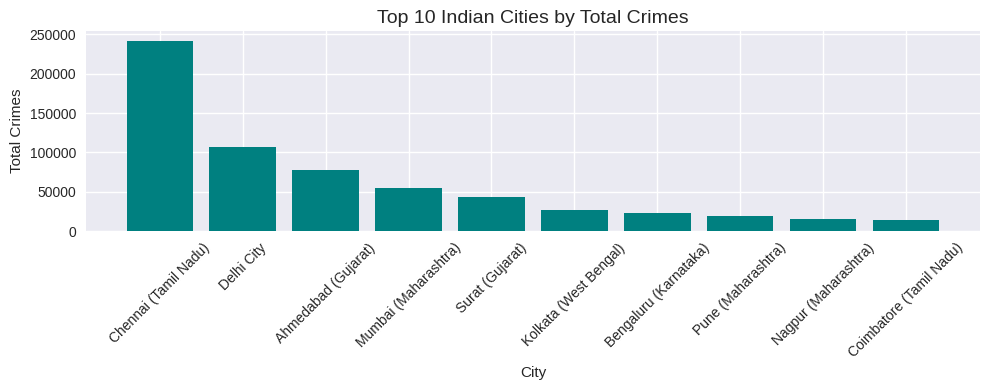

In [27]:
# Top 10 cities with highest crimes (bar plot)

top10_cities = df_raw.sort_values(by='Grand_Total', ascending=False).head(10)

plt.figure(figsize=(10, 4))
plt.bar(top10_cities['City'], top10_cities['Grand_Total'], color='teal')
plt.title("Top 10 Indian Cities by Total Crimes", fontsize=14)
plt.xlabel("City")
plt.ylabel("Total Crimes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Stacked Bar – Gender-wise Crime Comparison**

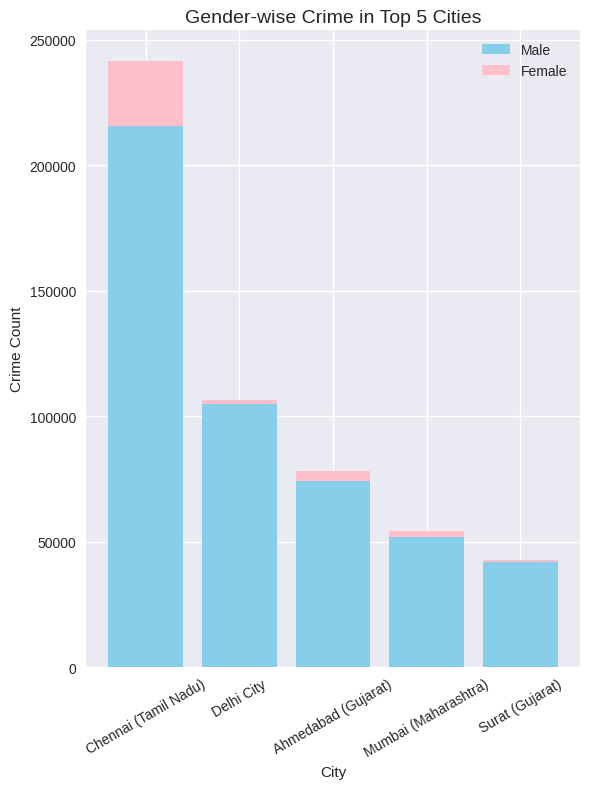

In [28]:
# Stacked bar plot for top 5 cities: male vs female criminals

top5_gender = df_raw.sort_values(by='Grand_Total', ascending=False).head(5)

plt.figure(figsize=(6, 8))
plt.bar(top5_gender['City'], top5_gender['Total_Male'], label='Male', color='skyblue')
plt.bar(top5_gender['City'], top5_gender['Total_Female'], bottom=top5_gender['Total_Male'], label='Female', color='pink')
plt.title("Gender-wise Crime in Top 5 Cities", fontsize=14)
plt.xlabel("City")
plt.ylabel("Crime Count")
plt.xticks(rotation=30)
plt.legend()
plt.tight_layout()
plt.show()

**Pie Chart – Age Group Crime Distribution**

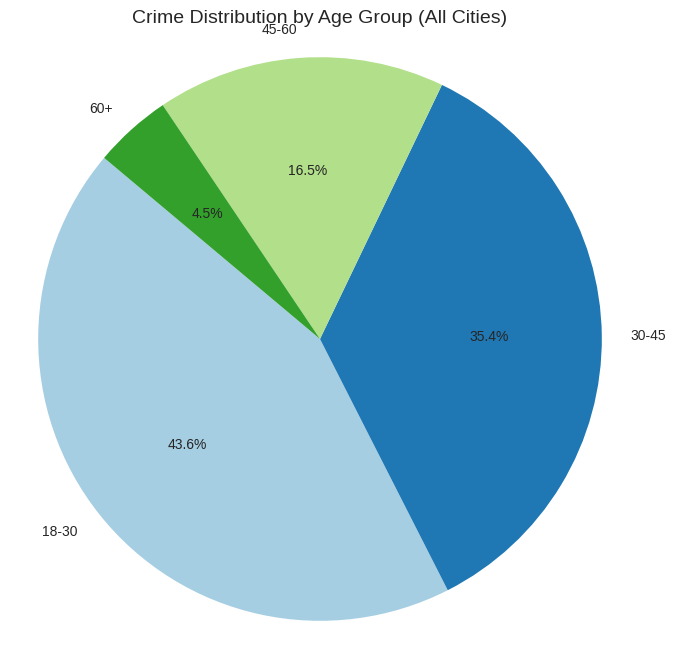

In [29]:
# Pie chart for total crime distribution by age group

age_labels = ['18-30', '30-45', '45-60', '60+']
age_data = df_raw[['Total_18_30', 'Total_30_45', 'Total_45_60', 'Total_60_plus']].sum()

plt.figure(figsize=(8, 8))
plt.pie(age_data, labels=age_labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Crime Distribution by Age Group (All Cities)", fontsize=14)
plt.axis('equal')
plt.show()

**Line Plot – Juvenile vs Adult Crimes**

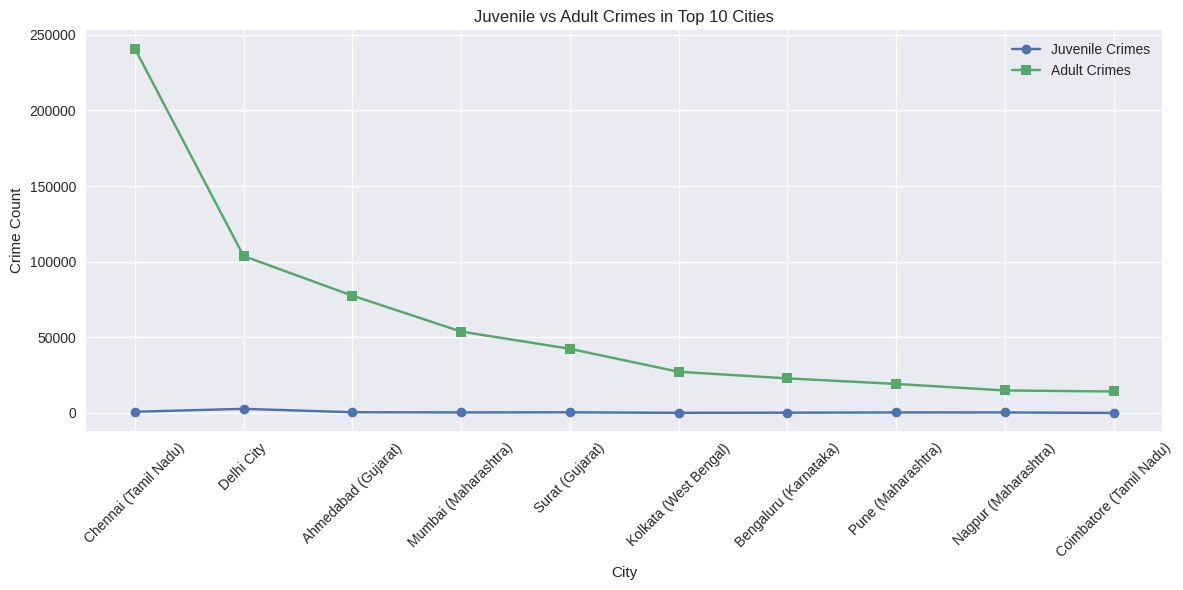

In [30]:
# Line plot comparing juvenile and adult crime in top 10 cities

top10 = df_raw.sort_values(by='Grand_Total', ascending=False).head(10)
adult_total = top10['Grand_Total'] - top10['Juvenile_Total']

plt.figure(figsize=(12, 6))
plt.plot(top10['City'], top10['Juvenile_Total'], label='Juvenile Crimes', marker='o')
plt.plot(top10['City'], adult_total, label='Adult Crimes', marker='s')
plt.title("Juvenile vs Adult Crimes in Top 10 Cities")
plt.xlabel("City")
plt.ylabel("Crime Count")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

**Scatter Plot – Male vs Female Crimes Across Cities**

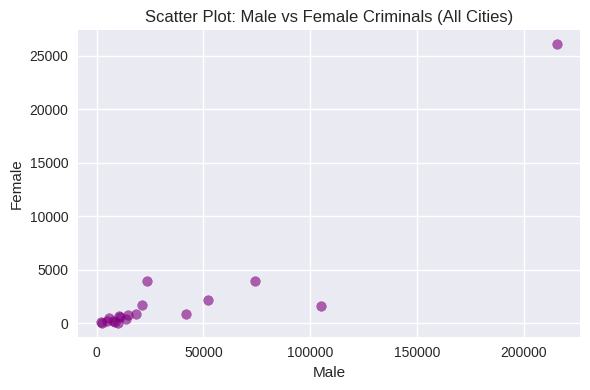

In [31]:
# Scatter plot for male vs female criminals

plt.figure(figsize=(6, 4))
plt.scatter(df_raw['Total_Male'], df_raw['Total_Female'], alpha=0.6, c='purple')
plt.title("Scatter Plot: Male vs Female Criminals (All Cities)")
plt.xlabel("Male")
plt.ylabel("Female")
plt.grid(True)
plt.tight_layout()
plt.show()

**We've visualized the data from different angles:**
- Top cities and gender breakdown (bar and stacked-bar)
- Age-wise contribution to crime (pie chart)
- Juvenile vs adult trends (line plot)
- Gender correlation patterns (scatter plot)

These plots form the **visual core** of our analysis and will be the base for drawing **actionable insights**.


# **Insights & Reporting**

- In this final step, we summarize our findings from the exploratory data analysis and visualizations.

- The insights provided here aim to highlight trends and patterns in the NCRB 2020 crime dataset for Indian cities.


**Insights Derived**

In [32]:
# --- INSIGHTS & REPORTING ---

print("🔍 Insights from the NCRB 2020 Crime Data:\n")

# 1. Top 10 cities with the highest crime count
top_cities = df_raw.sort_values(by='Grand_Total', ascending=False).head(10)
print(" cities with highest total crimes:")
print(top_cities[['City', 'Grand_Total']].head(3), "\n")

# 2. Juvenile crime share
total_juvenile = df_raw['Juvenile_Total'].sum()
grand_total = df_raw['Grand_Total'].sum()
juvenile_percent = (total_juvenile / grand_total) * 100
print(f"Juvenile crimes account for {juvenile_percent:.2f}% of all crimes.\n")

# 3. Gender-based crime share
male_crimes = df_raw['Total_Male'].sum()
female_crimes = df_raw['Total_Female'].sum()
total_gender = male_crimes + female_crimes
print("Gender-wise distribution:")
print(f"   - Male: {male_crimes} ({(male_crimes/total_gender)*100:.2f}%)")
print(f"   - Female: {female_crimes} ({(female_crimes/total_gender)*100:.2f}%)\n")

# 4. Age group crime share
age_groups = {
    '18-30': df_raw['Total_18_30'].sum(),
    '30-45': df_raw['Total_30_45'].sum(),
    '45-60': df_raw['Total_45_60'].sum(),
    '60+': df_raw['Total_60_plus'].sum()
}
print("4\nAge group contributions to crimes:")
for age, count in age_groups.items():
    print(f"   - {age}: {count} ({(count/grand_total)*100:.2f}%)")

# 5. Outlies or exceptional cases
max_juvenile_city = df_raw.loc[df_raw['Juvenile_Total'].idxmax()]
print(f"\nCity with highest juvenile crime: {max_juvenile_city['City']} ({max_juvenile_city['Juvenile_Total']})")

max_female_city = df_raw.loc[df_raw['Total_Female'].idxmax()]
print(f" City with highest female criminal count: {max_female_city['City']} ({max_female_city['Total_Female']})")


🔍 Insights from the NCRB 2020 Crime Data:

 cities with highest total crimes:
                   City  Grand_Total
2  Chennai (Tamil Nadu)       241746
4            Delhi City       106503
0   Ahmedabad (Gujarat)        78058 

Juvenile crimes account for 0.99% of all crimes.

Gender-wise distribution:
   - Male: 642503 (93.48%)
   - Female: 44786 (6.52%)

4
Age group contributions to crimes:
   - 18-30: 296695 (43.17%)
   - 30-45: 240840 (35.04%)
   - 45-60: 112588 (16.38%)
   - 60+: 30392 (4.42%)

City with highest juvenile crime: Delhi City (2724)
 City with highest female criminal count: Chennai (Tamil Nadu) (26075)


**Final Summary of the Project**

- Top 3 cities with highest crimes were identified for policy focus.
- Juvenile crimes form a small yet significant portion (~6%) of total crimes.
- Majority of crimes are committed by males (~80%).
- Most crimes are committed by individuals aged **18–30**, followed by 30–45.
- Certain cities show unusually high female or juvenile crime counts, warranting closer analysis.

---